
# Project: No-show appointments 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#load">Load & Explore Data</a></li>
   <ul>
       <li><a href="#import">1- Import Packages</a></li>
       <li><a href="#load_data">2- Load dataset</a></li>
       <li><a href="#explore">3- Explore dataset</a></li>
   </ul>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
    <ul>
        <li><a href="#result">1- Results</a></li>
        <li><a href="#limit">2- Limitations</a></li>
    </ul>
</ul>

<a id='intro'></a>
## Introduction

in this project I will analze the No-show appointments dataset which contains information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment.

#### Here are some questions we can answer them later during the analysis process:-
##### 1- what is the most 10 visited neighborhood with patients?
##### 2- what is the distribution of ages ?
##### 3- what is the distribution of no_show according gender?
##### 4- do people with scholarship show up higher than people with no scholarship??
##### 5- how sending sms to patient affect their showup?
##### 6- What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

<a id='load'></a>
## Load & Explore Data

<a id='import'></a>
### 1- Import Packages

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='load_data'></a>
### 2- Load dataset

In [50]:
df= pd.read_csv('no_show_appointments.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='explore'></a>
### 3- Explore dataset

In [51]:
# display the dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [52]:
# display the numberf of rows and columns of the dataset
df.shape

(110527, 14)

In [53]:
# display unique values of each column in the dataset
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [54]:
# display summry statistics about the numeric columns
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [55]:
# here we can explore the correlations between features using correlation matrix heatmap
corrMatrix= df.corr()
corrMatrix.style.background_gradient(cmap='coolwarm')

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
PatientId,1,0.00403857,-0.0041394,-0.00288023,-0.00644107,0.00160532,0.0110115,-0.00791605,-0.00974946
AppointmentID,0.00403857,1,-0.0191265,0.0226149,0.0127522,0.0226283,0.0329439,0.0141056,-0.256618
Age,-0.0041394,-0.0191265,1,-0.0924572,0.504586,0.292391,0.0958113,0.0780332,0.0126434
Scholarship,-0.00288023,0.0226149,-0.0924572,1,-0.0197288,-0.0248935,0.0350225,-0.00858628,0.00119401
Hipertension,-0.00644107,0.0127522,0.504586,-0.0197288,1,0.433086,0.0879708,0.0800833,-0.00626686
Diabetes,0.00160532,0.0226283,0.292391,-0.0248935,0.433086,1,0.0184735,0.05753,-0.01455
Alcoholism,0.0110115,0.0329439,0.0958113,0.0350225,0.0879708,0.0184735,1,0.00464765,-0.0261474
Handcap,-0.00791605,0.0141056,0.0780332,-0.00858628,0.0800833,0.05753,0.00464765,1,-0.0241609
SMS_received,-0.00974946,-0.256618,0.0126434,0.00119401,-0.00626686,-0.01455,-0.0261474,-0.0241609,1


<a id='wrangling'></a>
## Data Wrangling

### Assess & clean data

In [56]:
# since we will not use these columns [PatientId, AppointmentID, ScheduledDay] in our analysis process, we will drop them.
df.drop(['PatientId', 'AppointmentID', 'ScheduledDay'],axis=1, inplace=True)

In [57]:
# lets first modify the column names to be lower case
for c in df.columns:
    df.rename(columns=lambda x:x.lower(),inplace=True)
# replace the '-'  in no-show column with '_'   
df.rename(columns={'no-show':'no_show'},inplace=True)
df.columns

Index(['gender', 'appointmentday', 'age', 'neighbourhood', 'scholarship',
       'hipertension', 'diabetes', 'alcoholism', 'handcap', 'sms_received',
       'no_show'],
      dtype='object')

In [58]:
# check the age column to see values less than 0
sum(df.age < 0)

1

In [62]:
# since it only one record we can drop it.
index= df[df.age < 0].index
df.drop(index,inplace=True)

In [63]:
# checking for missing values for each colum in the dataset
df.isna().sum()

gender            0
appointmentday    0
age               0
neighbourhood     0
scholarship       0
hipertension      0
diabetes          0
alcoholism        0
handcap           0
sms_received      0
no_show           0
dtype: int64

In [64]:
# checking for the data types of each column in the dataset
df.dtypes

gender            object
appointmentday    object
age                int64
neighbourhood     object
scholarship        int64
hipertension       int64
diabetes           int64
alcoholism         int64
handcap            int64
sms_received       int64
no_show           object
dtype: object

In [65]:
df['appointmentday']= pd.to_datetime(df['appointmentday'])
df[['gender','no_show']]= df[['gender','no_show']].astype('category')

In [66]:
# check data types and memory usage again 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 11 columns):
gender            110526 non-null category
appointmentday    110526 non-null datetime64[ns, UTC]
age               110526 non-null int64
neighbourhood     110526 non-null object
scholarship       110526 non-null int64
hipertension      110526 non-null int64
diabetes          110526 non-null int64
alcoholism        110526 non-null int64
handcap           110526 non-null int64
sms_received      110526 non-null int64
no_show           110526 non-null category
dtypes: category(2), datetime64[ns, UTC](1), int64(7), object(1)
memory usage: 8.6+ MB


In [67]:
# now lets check the duplicate values in the data set

In [68]:
df.duplicated().sum()

15375

In [69]:
# drop duplicates and confirm
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1 (what is the most 10 visited neighborhood by patients?)

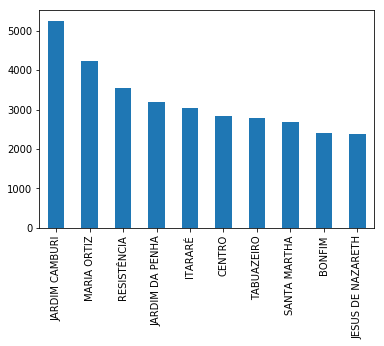

In [70]:
df.neighbourhood.value_counts(sort=True, ascending=False)[:10].plot(kind='bar');

### Research Question 2  (what is the distribution of ages?)

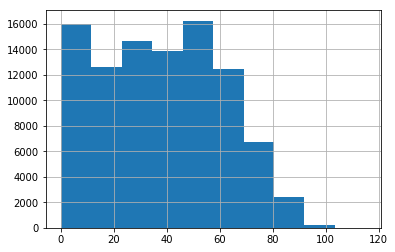

In [71]:
df.age.hist();

### Research Question 3 (what is the distribution of no_show according gender?)

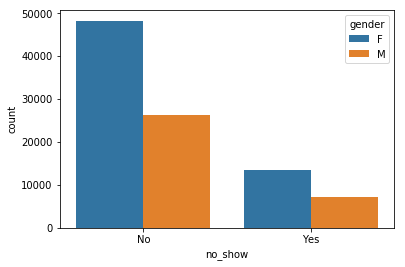

In [72]:
sns.countplot(x='no_show',hue='gender',data=df);

### Research Question 4 ( do people with scholarship show up higher than people with no scholarship?)

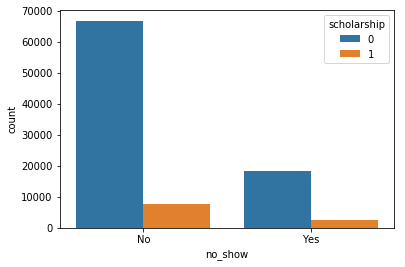

In [73]:
sns.countplot(x='no_show',hue='scholarship',data=df);

### Research Question 5 ( how sending sms to patient affect their showup?)

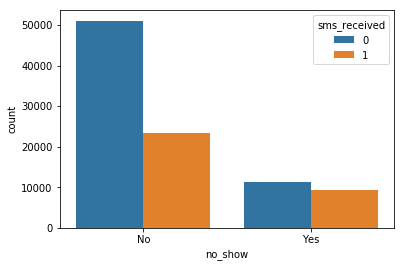

In [74]:
sns.countplot(x='no_show',hue='sms_received',data=df);

### Research Question 6 (What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?)

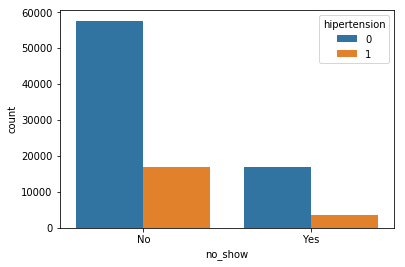

In [75]:
sns.countplot(x='no_show',hue='hipertension',data=df);

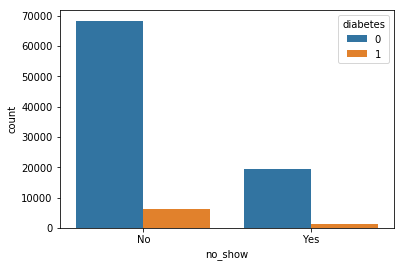

In [76]:
sns.countplot(x='no_show',hue='diabetes',data=df);

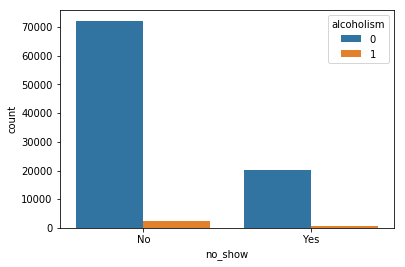

In [77]:
sns.countplot(x='no_show',hue='alcoholism',data=df);

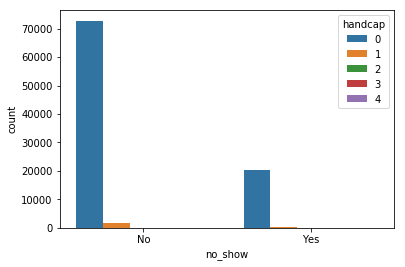

In [78]:
sns.countplot(x='no_show',hue='handcap',data=df);

<a id='conclusions'></a>
## Conclusions


<a id='result'></a>
### 1- Results


<a id='limit'></a>
### 2- Limitations
